# The infinite monkey

1. Suppose there exists an inifinite monkey that randomly types on a keyboard. It generates a lineal stream of characters.

2. Each character has the same probability of being typed and they are all independent with respect to one another.

3. Let $m$ be the number of keys on the keyboard, and let $N$ be the total number of characters of a desired sentence.

4. Let $X_n$ be the total number of correctly typed characters at moment $n$.

5. Since the value $X_{n+1}$ depends on $X_n$, this is certainly a Markov Chain.

This implies:

$$
\begin{align}
    \mathbb{P}(X_{n+1} = n+1 \ | \ X_n=n) = \frac{1}{m}\\
    \\
    \mathbb{P}(X_{n+1} = 0 \ | \ X_n=n) = \frac{m - 1}{m}
\end{align}
$$

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import choice
from matplotlib import style
style.use("seaborn-white")

In [2]:
letters = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z".lower().split()
letters.append(" ")

writing = ""
for i in range(334):
    writing += choice(letters)
writing

'vnvnyn jeinqelpsyihdvitnjvysavahbugcqebbxidoiwdcdkbqgdbvf hsautqmaxuabslp  dqlf etetvnwytkonwpbegsxqi aioigwwtnnxgyaiuacmbvfuuvefwstwlklfmecturqzudhmrayjunviksxaiarttgjl pbmkbjehz atkaz lwbswclrnxoymltgrvkaimdfxmfkypwakmqkwbshlpsjdjoefwqvnjqupfuizfqslpzaoqmxtygyegimsbivbpskv gzostpqgnkidzjvq  jeuknxivvfswmdgwaruffx tjmdssqkrldhkknre'

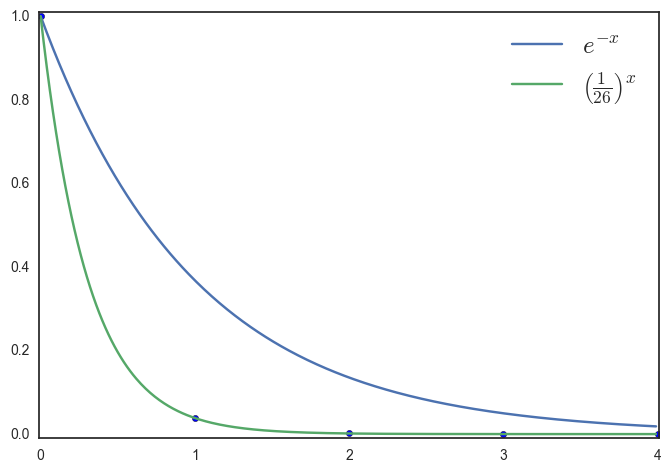

In [2]:
img_path = "/Users/gerardo/Documents/github/UMA/stochastic_processes/final_proyect/images/"

x = np.arange(0, 4, 0.01)
x_pr = [0, 1, 2, 3, 4]
neg_exp = np.exp(-x)
prob_words_func = (1/26)**x
prob_words = [(1/26)**n for n in x_pr]

plt.plot(x, neg_exp, label=r"$e^{-x}$")
plt.plot(x, prob_words_func, label=r"$\left(\frac{1}{26}\right)^x$")
plt.scatter(x_pr, prob_words)
plt.legend(fontsize=18)
plt.xlim((-0.01,4.01))
plt.ylim((-0.01,1.01))
plt.savefig(img_path + "decay.png", dpi=300)
plt.show()

In [3]:
with open("./monkey.pickle", "rb") as f:
    monkey_data = pickle.load(f)
monkey_data = pd.DataFrame(monkey_data)

In [67]:
monkey_data.ix[:,:5]

round_0  round_1  round_2  round_3  round_4
m            33       48        3       70       37
ma           97     1731      959      708      101
mat        5278     4078     7138    15558    45120
math     375920   350083   422496   119231   314245
maths  15020244   869251  2593517  7491161  3655613

In [69]:
mean_count = pd.DataFrame(monkey_data.apply(np.mean, axis=1), columns=["empirical_count"])
theoretical_count = pd.DataFrame([26**n for n in range(1,6)],
                                 index = mean_comparisson.index, columns=["theoretical_count"])
counts_df = mean_count.join(theoretical_count)
print(counts_df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  empirical\_count &  theoretical\_count \\
\midrule
m     &            23.74 &                 26 \\
ma    &           722.70 &                676 \\
mat   &         13523.44 &              17576 \\
math  &        378905.52 &             456976 \\
maths &      10659714.96 &           11881376 \\
\bottomrule
\end{tabular}



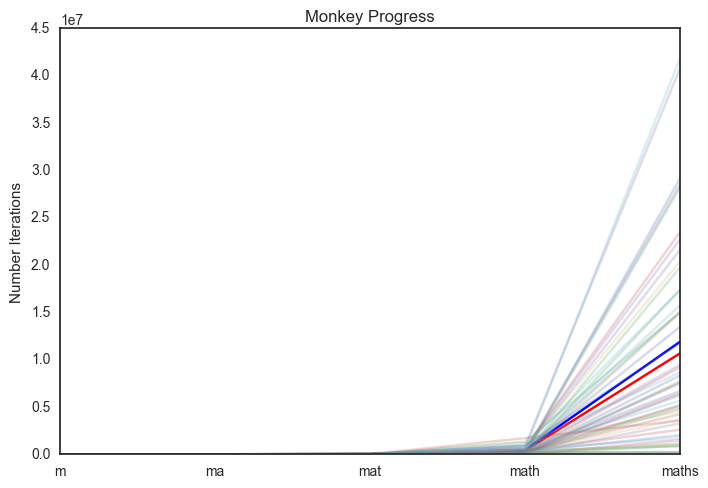

In [8]:
# Theoretical Count of words
x = monkey_data.index
count_theoretical = np.array([26**n for n in range(1,6)])

# Mean simulated count of words
count_simulated = monkey_data.apply(func=np.mean, axis=1)

plt.plot(range(1,6), count_simulated, color="red")
plt.plot(range(1,6), count_theoretical, color="blue")
plt.plot(range(1,6), monkey_data, alpha=0.25)

plt.title("Monkey Progress")
plt.ylabel("Number Iterations")
plt.xticks(range(1,6), monkey_data.index)
plt.show()

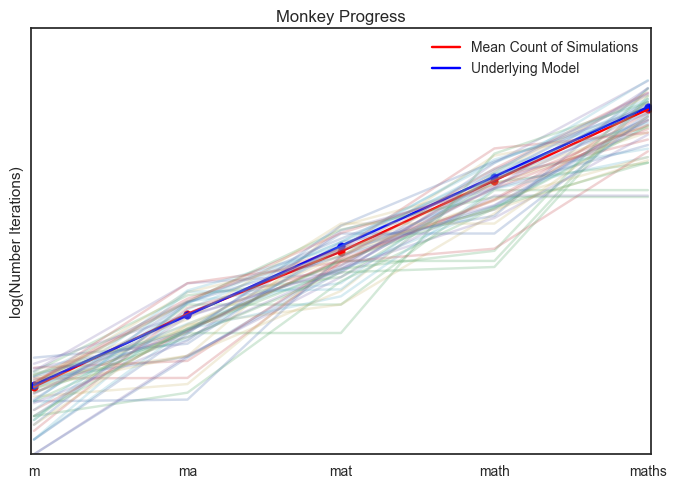

In [65]:
plt.scatter(range(1,6), np.log(count_simulated), color="red", s=30)
plt.plot(range(1,6), np.log(count_simulated), color="red", label="Mean Count of Simulations")

plt.scatter(range(1,6), np.log(count_theoretical), color="blue", s=30)
plt.plot(range(1,6), np.log(count_theoretical), color="blue", label="Underlying Model")

plt.plot(range(1,6), np.log(monkey_data), alpha=0.25)

plt.title("Monkey Progress")
plt.ylabel("log(Number Iterations)")
plt.xticks(range(1,6), monkey_data.index)

plt.xlim(0.98,5.02)
plt.ylim(0,20)
plt.legend()
plt.tick_params(axis="y", labelleft="off")
#plt.savefig(img_path + "log_approx.png", dpi=300)
plt.show()

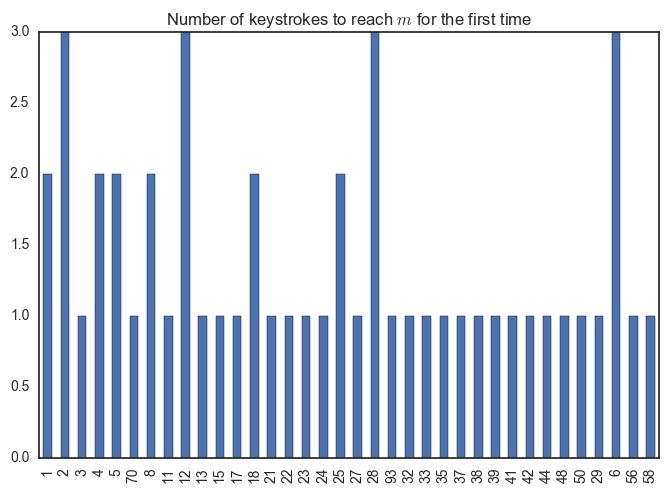

In [12]:
pd.value_counts(monkey_data.ix["m", :], sort=False).plot(kind="bar")
plt.title("Number of keystrokes to reach $m$ for the first time")
plt.show()

# Approximate Number of keystrokes required to complete shakespeare's works of art

In [75]:
26 ** (884421*5)

5211089041333452970869309130870429835497792062481742705117864139975194812394250028934252307513559625335507040843268059991624711204344904440938672990989602441396222222075389159767919432588260403376137380563083886390391283290358896050786532126156011868489211324250277468338657263195327013190074281260711623937806010029054103767322901011070435038452880564372533138374645907226753498245052806462228089712113028666547901689426453596339751051415661515063396972589799945019045732313847061476651753700684609138193312670957672024159616279310705421051105669449832251150536663209483624382207462114334027742357502299006880603603900140019541341603955498971156679195701485716031002679943566550993036921693384950145553684035826768043156952793644042149496412901671155292399633337970799602306012553676422563421000095481164548642480978935977263100601417222227869165464239097569165986666604106411007698594621520980156750823988826618531366068346956470780121215235585713955043490791897458108105082507861337311503969737479